# This is a visualization of usage over time fo the Toronto Bike data available through Open Data from the City of Toronto

## Historical data can be found: https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/

In [61]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
	
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "7e876c24-177c-4605-9cef-e50dd74c617f"}
package = requests.get(url, params = params).json()


#print the available files, their format, size, and ID
print("Available Datasets\n")
print("name\t", "format\t\t", "size\t\t", "ID")
print("----------------------------------------------------------------------------------")
for d in (package["result"]['resources']):
    print(d['name'], d["format"], d['size'],d['id'])

#Accessing of dataset Bike share ridership 2021-01
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/7e876c24-177c-4605-9cef-e50dd74c617f/resource/d4a7b25c-edd0-4c1b-954a-79b6559477c4/download/2021-01.csv"
params = { "pkg": "7e876c24-177c-4605-9cef-e50dd74c617f", "res":"d4a7b25c-edd0-4c1b-954a-79b6559477c4"}
data = requests.get(url).content
decoded_data = data.decode("ISO-8859-1")
d = pd.read_csv(io.StringIO(decoded_data), sep = ",")

#Convert to datetime and add column called "Length" for duration of trip
d['Start Time'] = pd.to_datetime(d['Start Time'], format = "%m/%d/%Y %H:%M")
d['End Time'] = pd.to_datetime(d['End Time'], format = "%m/%d/%Y %H:%M")
d["Length"] = d['End Time'] - d['Start Time']
d["Length"] = d["Length"].astype('timedelta64[m]')


Available Datasets

name	 format		 size		 ID
----------------------------------------------------------------------------------
bikeshare-ridership-readme XLSX 16625 a1a0ee42-caf5-4395-abbc-58925c7434dd
bikeshare-ridership-2014-q4-2015-q3 XLSX 1465200 f931a332-09de-494b-afb0-c811c6ec4043
bikeshare-ridership-2016-q3 XLSX 18885816 34c07f2a-abde-4d4f-9ee6-267a312f68e6
bikeshare-ridership-2016-q4 XLSX 9822853 fe1fc5c4-ba3e-480e-ad70-db5dc3097242
bikeshare-ridership-2017 ZIP 24484084 3bcb847b-bf1e-43a6-a385-8afef74ee840
Bike Share Ridership 2018 ZIP 34011563 81ea3260-057a-4e62-ae45-1f40191a8229
Bike Share Ridership 2019  ZIP 324112878 f57f20db-8353-44f7-ab61-d499ac1b31c1
Bike share ridership 2020 ZIP 389354150 5f5d78c4-d810-4048-9dac-c18273abffac
Bike share ridership 2021-01 CSV 11528928 d4a7b25c-edd0-4c1b-954a-79b6559477c4
Bike share ridership 2021-02 CSV 7835416 d4a5ef48-2006-4e2b-b9a9-d6791ea04004
Bike share ridership 2021-03 CSV 21013317 9ab4727e-06e4-402b-a467-f411f03ffb66
Bike share r

Plot a histogram of trip duration to get a sense of the data

Text(0.5, 0, 'Trip Duration (minutes)')

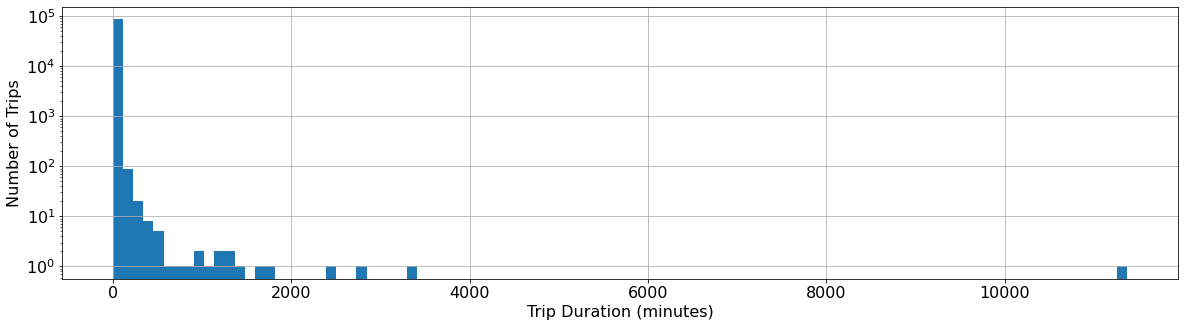

In [71]:

#Plot duration histrogram (maybe someone stole a bike....)
plt.yscale("log")
d["Length"].hist(xlabelsize = 16, ylabelsize = 16, bins = 100, figsize = (20,5))
plt.ylabel("Number of Trips", size = 16)
plt.xlabel("Trip Duration (minutes)", size = 16)
